In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import numpy as np

df = pd.read_csv("data/Donations_Merge")
df = df.drop(columns=['Unnamed: 0'])

In [53]:
df.head(3)

,ID,LastName,FirstName,email,Woman,Age,Salary,Education,City,Joined,...,2015,2016,2017,2018,2019,2020,2021,2022,Amount,Contacted
0,5000001.0,ALBERSON,TISH,tish@overview.com,Yes,49,169200.0,University / College,Downtown,2016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
1,5000002.0,DAVIES,ANDREA,andrea@myschool.edu,Yes,69,2900.0,Elementary,Suburban,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
2,5000003.0,CALDWELL,JANIS,janis@mymail.ca,Yes,35,12600.0,High School,City,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [36]:
len(df)

1000000

## Explore current variables

In [38]:
def plot_donations_heatmap(df, current_year=2022, columns_to_plot=None):
    """
    Plot a heatmap to explore the relationship between donation amount and other selected columns in the dataset.
    The x-axis represents the donation amount, and the y-axis represents the categories of the column.
    For numerical columns, 10 bins are created.
    
    Parameters:
    - df (DataFrame): The dataframe containing member data with donation columns for each year.
    - current_year (int): The current year to calculate the donation amounts for (default is 2022).
    - columns_to_plot (list): A list of column names to include in the analysis. 
                               If None, all columns except the donation column are included.
    """
    
    # Get the donation column for the current year (e.g., 'Amount_2022')
    donation_column = f"{current_year}"
    
    # If no columns_to_plot is specified, use all columns except the donation column
    if columns_to_plot is None:
        columns_to_plot = [col for col in df.columns if col != donation_column]

    # Loop over the specified columns and plot the heatmaps
    for col in columns_to_plot:
        if df[col].dtype == 'object' or df[col].dtype == 'category':  # Categorical columns
            plt.figure(figsize=(7, 5))
            # Count the number of donors for each category based on donation amount
            pivot = pd.crosstab(pd.cut(df[donation_column], bins=10),df[col])  # Binning donations into 10 bins
            pivot = pivot.div(pivot.sum(axis=1), axis=0)  # Normalize to get proportions

            # Plot the heatmap
            sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
            plt.title(f"Donation Amount by {col}")
            plt.xlabel(f"Donation Amount Bins ({donation_column})")
            plt.ylabel(f"{col} Categories")
            plt.tight_layout()
            plt.show()

        else:  # Numerical columns
            plt.figure(figsize=(7, 5))
            # Bin the numerical column into 10 equal-width bins
            bins = np.linspace(df[col].min(), df[col].max(), 11)
            pivot = pd.crosstab(pd.cut(df[donation_column], bins=10), pd.cut(df[col], bins=10)) # Binning both
            pivot = pivot.div(pivot.sum(axis=1), axis=0)  # Normalize to get proportions

            # Plot the heatmap
            sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
            plt.title(f"Donation Amount by {col}")
            plt.ylabel(f"Donation Amount ({donation_column})")
            plt.xlabel(f"{col} Binned")
            plt.tight_layout()
            plt.show()


<span style="color: blue;">
- The amount donated in 2022, was higher, in individuals with age between 38 and 60 <br>
- Higher salary is some how related with a higher amount donated <br>
- Of those who donated more than 9.000 in 2022, mayority were men 60\% <br>
- The amount donated in 2022, was higher, in individuals with age between 38 and 60 <br>
-  Hihger donations in suburban and city
- Higher donations from those with university level Highschool
</span>  

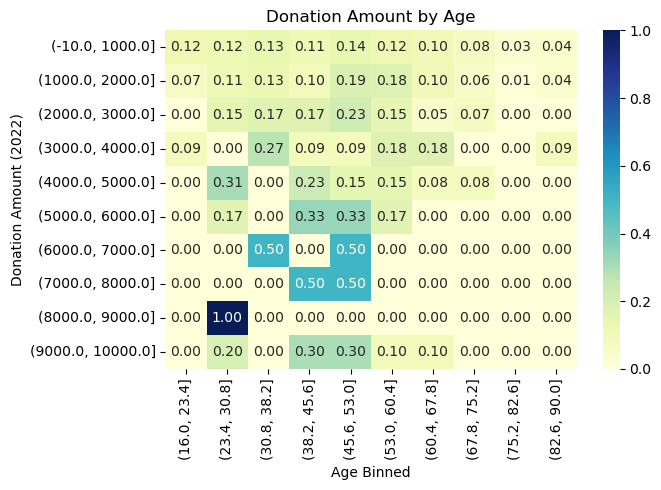

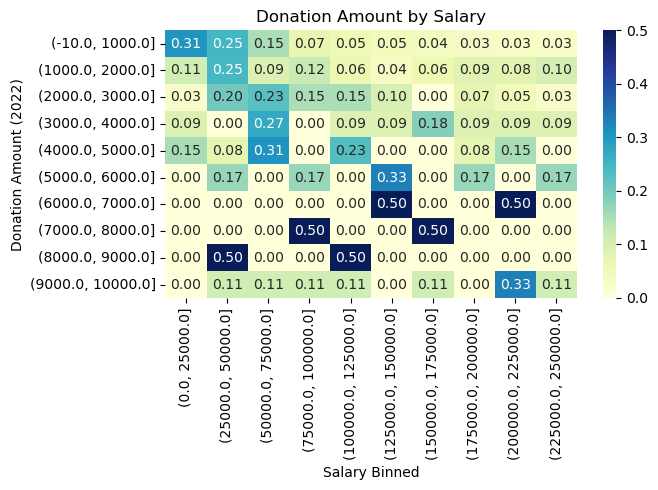

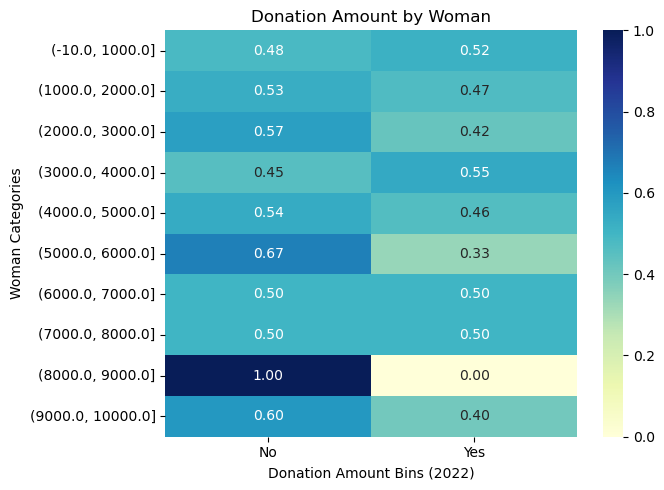

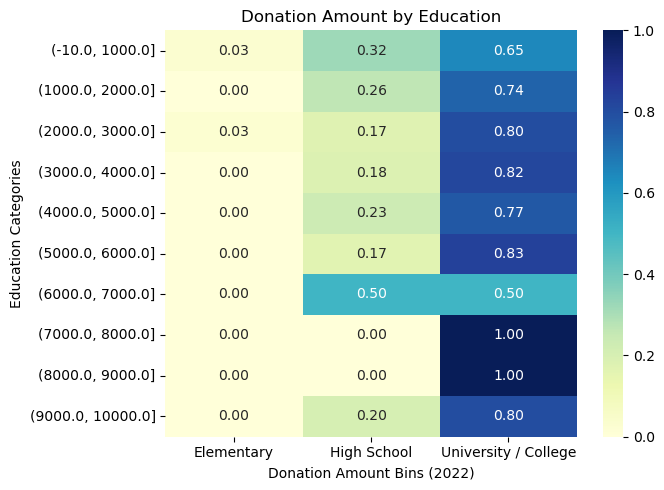

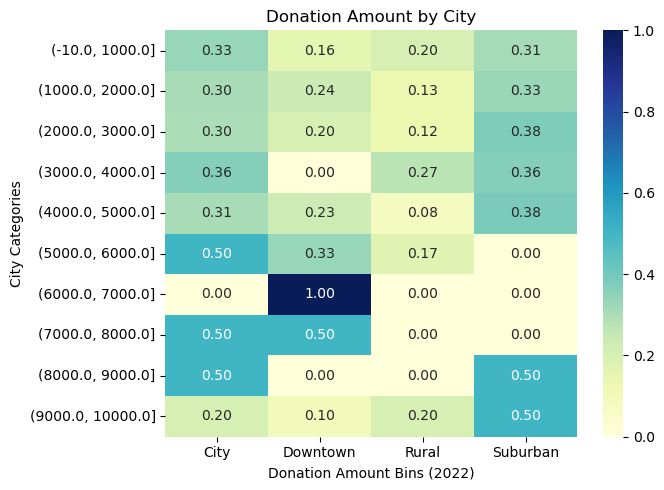

In [34]:
columns_to_plot = ['Age', 'Salary','Woman', 'Education', 'City'] 
plot_donations_heatmap(df, current_year=2022, columns_to_plot=columns_to_plot)

<span style="color: blue;">
- The amount donated in 2022, was higher, in individuals with age between 38 and 60 <br>
- Higher salary is some how related with a higher amount donated <br>
- Of those who donated more than 9.000 in 2022, mayority were men 60\% <br>
- The amount donated in 2022, was higher, in individuals with age between 38 and 60 <br>
-  Hihger donations in suburban and city
- Higher donations from those with university level Highschool
</span>  

## Explore New variables

In [48]:
def calculate_donations_metrics(df, current_year=2022):
    """
    Calculate donation metrics for each member based on the years available.
    
    Parameters:
    - df (DataFrame): The dataframe containing member data with donation columns for each year.
    - current_year (int): The current year to calculate metrics up to (default is 2022).

    Returns:
    - df (DataFrame): The original dataframe with new calculated columns for donation metrics.
    """
    
    # Get the donation columns dynamically based on the years in the dataframe
    donation_years = [str(year) for year in range(current_year-10, current_year)]  # Donations from current_year-10 to current_year

    # Create variables for donations in the last 3 and 5 years
    df['Amount_last_3_years'] = df[donation_years[-3:]].sum(axis=1)
    df['Amount_last_5_years'] = df[donation_years[-5:]].sum(axis=1)

    # Calculate the average donations in the last 3 and 5 years
    df['Avg_last_3_years'] = df[donation_years[-3:]].gt(0).sum(axis=1)  # Count non-zero donations
    df['Avg_last_3_years'] = df['Amount_last_3_years'] / df['Avg_last_3_years'].replace(0, 1)  # Prevent division by 0

    df['Avg_last_5_years'] = df[donation_years[-5:]].gt(0).sum(axis=1)  # Count non-zero donations
    df['Avg_last_5_years'] = df['Amount_last_5_years'] / df['Avg_last_5_years'].replace(0, 1)  # Prevent division by 0

    # Calculate the max donation in the last 3 and 5 years
    df['Max_last_3_years'] = df[donation_years[-3:]].max(axis=1)
    df['Max_last_5_years'] = df[donation_years[-5:]].max(axis=1)

    # Calculate the number of years since the member joined
    df['Years_since_joined'] = current_year - df['Joined']

    # Calculate the number of times donated in the last 3 and 5 years
    df['Times_donated_last_3_years'] = df[donation_years[-3:]].gt(0).sum(axis=1)
    df['Times_donated_last_5_years'] = df[donation_years[-5:]].gt(0).sum(axis=1)

    # Calculate the total number of years donated (non-zero donations across all years)
    df['Total_times_donated'] = df[donation_years].gt(0).sum(axis=1)

    return df

# Example usage:
# Assuming df is your DataFrame containing the donations data (from 2011 to 2022)

df = calculate_donations_metrics(df, current_year=2022)

# Display the new DataFrame with the calculated metrics
print(df[['ID', 'Amount', '2022', 'Amount_last_3_years', 'Avg_last_3_years', 'Amount_last_5_years', 
          'Avg_last_5_years', 'Max_last_3_years', 'Max_last_5_years', 
          'Years_since_joined', 'Times_donated_last_3_years', 
          'Times_donated_last_5_years', 'Total_times_donated']].head())

          ID  Amount  2022  Amount_last_3_years  Avg_last_3_years  \
0  5000001.0     0.0   0.0                  0.0               0.0   
1  5000002.0     0.0   0.0                  0.0               0.0   
2  5000003.0     0.0   0.0                  0.0               0.0   
3  5000004.0     0.0   0.0                  0.0               0.0   
4  5000005.0    10.0   0.0                 10.0              10.0   

   Amount_last_5_years  Avg_last_5_years  Max_last_3_years  Max_last_5_years  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                 10.0              10.0              10.0              10.0   

   Years_since_joined  Times_donated_last_3_years  Times_donated_last_5_years  \
0                   6  

In [49]:
df[df['ID']==5000021][['FirstName', 'Salary',
       'Education', 'Joined','2017', '2018', '2019', '2020', '2021', '2022', 'Amount',
       'Contacted', 'Amount_last_3_years', 'Amount_last_5_years',
       'Avg_last_3_years', 'Avg_last_5_years', 'Max_last_3_years',
       'Max_last_5_years', 'Years_since_joined', 'Times_donated_last_3_years',
       'Times_donated_last_5_years', 'Total_times_donated']]

,FirstName,Salary,Education,Joined,2017,2018,2019,2020,2021,2022,...,Amount_last_3_years,Amount_last_5_years,Avg_last_3_years,Avg_last_5_years,Max_last_3_years,Max_last_5_years,Years_since_joined,Times_donated_last_3_years,Times_donated_last_5_years,Total_times_donated
20,STACI,22000.0,University / College,2020,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0


<span style="color: blue;">
- The donated amount in previous years, does not seem to relate to the amount donated in 2022 <br>
- However the number of times that they donates seems to have more relationship. For instance, 30% of those that donated once in the previous 3 years,donated more than 9.000 in 2022. <br>
</span>  

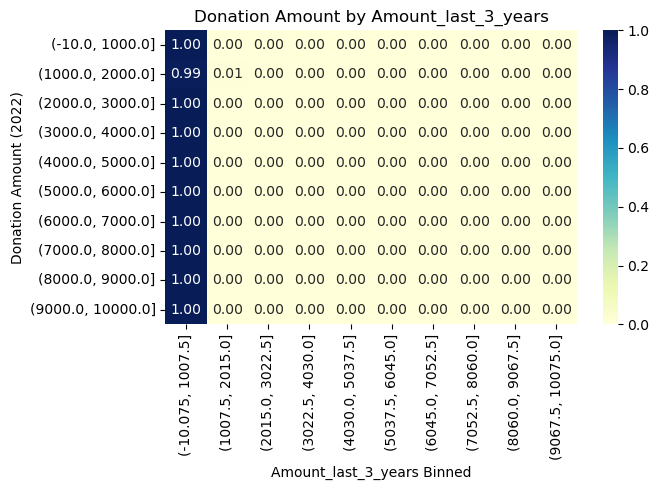

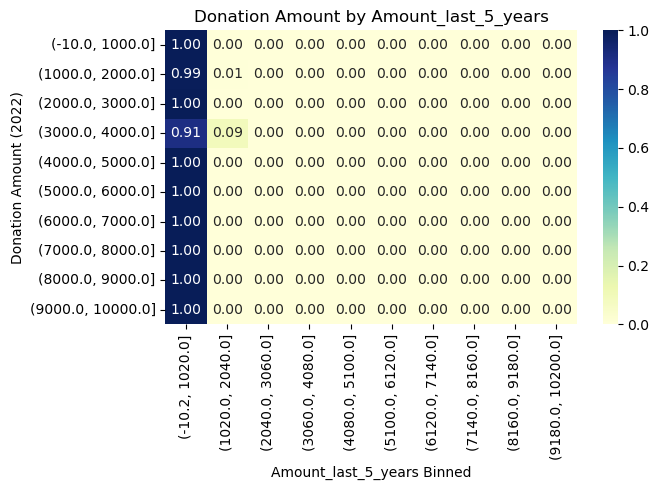

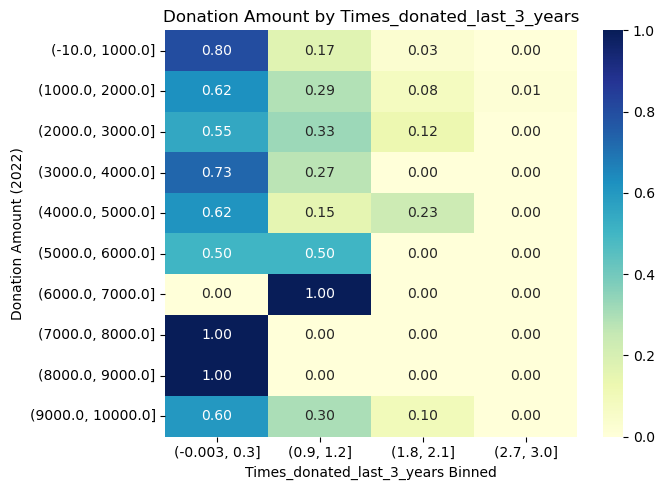

In [51]:
columns_to_plot = ['Amount_last_3_years', 'Amount_last_5_years','Times_donated_last_3_years'] 
plot_donations_heatmap(df, current_year=2022, columns_to_plot=columns_to_plot)

# Remarks..

## The number of times donated may work better in the modelling than the amount donated per se
## City, Education and salary seem to discriminate, but the effect is mix, tree methods may do the trick